In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

Mahalanobis distance

$ D = \sqrt{(x - \mu)^T \Sigma^{-1} (x - \mu)} $

Fisher's method의 목적  : Class간의 거리를 최대화, 각 class 분산은 최소화

$ x=(x_1,x_2 ... x_p) $

$ Var[x]=\Sigma $

가중치 벡터 w에 대해 $Z=w^Tx$

1. mapping 된 곳에서의 거리 차이가 크다 : $ w^T(\mu_1-\mu_2)$ 가 크다
2. 각 클래스 간의 분산은 작다 : $ Var[w^Tx]=w^T \Sigma w$ 가 작다


# $ \lambda = \frac{w^T(\mu_1-\mu_2)}{w^T \Sigma w}$

따라서 w는 $\Sigma$ 에 반비례,$ (\mu_1-\mu_2)$ 에 비례한다.

수식으로 나타내면 w=$ \Sigma^{-1}(\mu_1-\mu_2)$로 표현할 수 있다( w의 방향만)







표본의 수가 적을 때 합동 공분산 활용(Pooled variance-covariance matrix)


등분산 가정하고 하기. 수업떄는 따로 안했는데, 다음에는 등분산 가정을 먼저 하고 해보기

# $ S_p = \frac{(n_1-1)S_1 + (n_2-1)S_2}{(n_1-1)+(n_2-1)}$


In [7]:
x1=np.array([5,4,7,8,3,2,6,9,5])
x2=np.array([7,3,8,6,6,5,6,6,4])
y=np.array([1,2,2,2,1,1,1,2,2])

data = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
data

,x1,x2,y
0,5,7,1
1,4,3,2
2,7,8,2
3,8,6,2
4,3,6,1
5,2,5,1
6,6,6,1
7,9,6,2
8,5,4,2


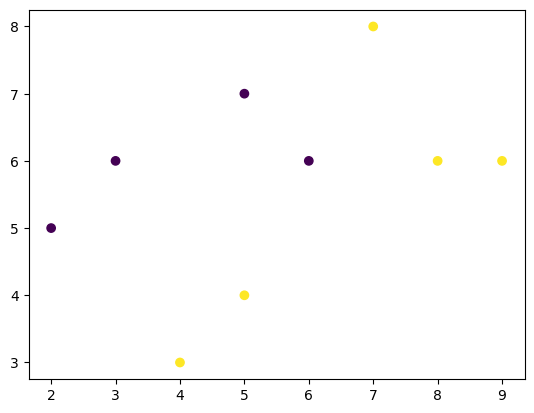

In [9]:
plt.scatter(x1,x2,c=y)
plt.show()

In [40]:
# 각 클래스별 평균 구해주기
x_class_1 = np.array( data.loc[data['y'] == 1,['x1','x2']].mean())
x_class_2 = np.array( data.loc[data['y'] == 2,['x1','x2']].mean())

In [31]:
# 공분산행렬 구해주기

S1=np.cov(data[data['y'] == 1]['x1'],data[data['y'] == 1]['x2'])
S2=np.cov(data[data['y'] == 2]['x1'],data[data['y'] == 2]['x2'])

# S1은 4, S2의 데이터는 5 이므로, 분모는 4+5-2, 분자는 3과 4를 곱해주기
Sp=(3*S1 + 4*S2) / (7)


array([[3.88571429, 2.11428571],
       [2.11428571, 2.45714286]])

In [42]:
w = np.linalg.inv(Sp) @ ( x_class_1-x_class_2)

In [43]:
w

array([-1.50803859,  1.54180064])

# -1.5080 x1 + 1.5418 x2= b 를 만족하는 직선

In [46]:
b = 0.5 * w@(x_class_1+x_class_2)
b

0.7956591639871382

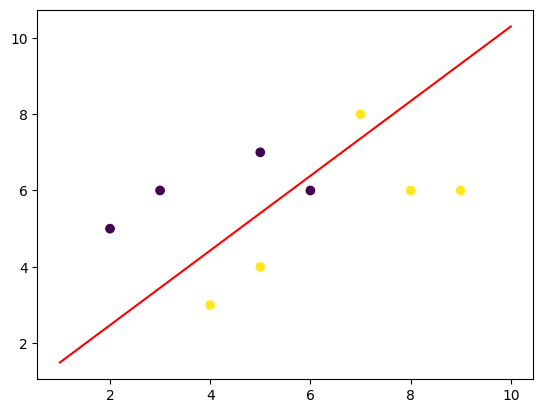

In [72]:
# -1.50 x1 + 1.54 x2 = 0.79를 만족하는 직선 위라면 class1로 분류, 아래라면 2로 분류할 것

x_range=np.array([1,10])
plt.plot(x_range, (-w[0]*x_range+b) / w[1] ,color='red')
plt.scatter(x1,x2,c=y)
plt.show()


In [56]:
data

,x1,x2,y
0,5,7,1
1,4,3,2
2,7,8,2
3,8,6,2
4,3,6,1
5,2,5,1
6,6,6,1
7,9,6,2
8,5,4,2


In [62]:
data['Z']=w[0]*data['x1']+w[1]*data['x2']
data

,x1,x2,y,Z
0,5,7,1,3.252412
1,4,3,2,-1.406752
2,7,8,2,1.778135
3,8,6,2,-2.813505
4,3,6,1,4.726688
5,2,5,1,4.692926
6,6,6,1,0.202572
7,9,6,2,-4.321543
8,5,4,2,-1.372990


In [65]:
data['pred_y']=data['Z'].map(lambda x: 1 if x>b else 2)

In [66]:
data

,x1,x2,y,Z,pred_y
0,5,7,1,3.252412,1
1,4,3,2,-1.406752,2
2,7,8,2,1.778135,1
3,8,6,2,-2.813505,2
4,3,6,1,4.726688,1
5,2,5,1,4.692926,1
6,6,6,1,0.202572,2
7,9,6,2,-4.321543,2
8,5,4,2,-1.372990,2


In [76]:
acc =1- len(data[data['pred_y']!=data['y']])/len(data)
acc

0.7777777777777778